## Logistic Regression

Logistic Regression produces results in a <b>binary format</b> which is used to predict the outcome of a categorical dependent variable. So the outcome should be <b>discrete/ categorical</b> such as: 0/1, Yes/No, True/False, High/Low etc.<br>

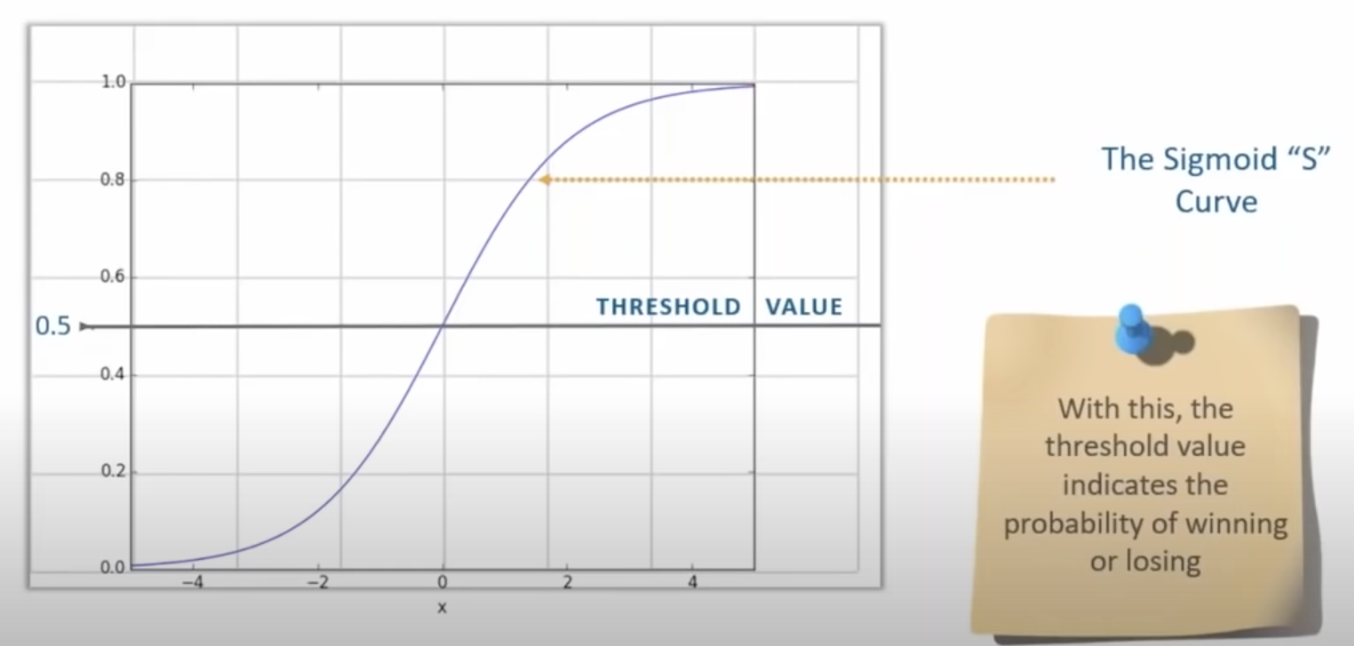

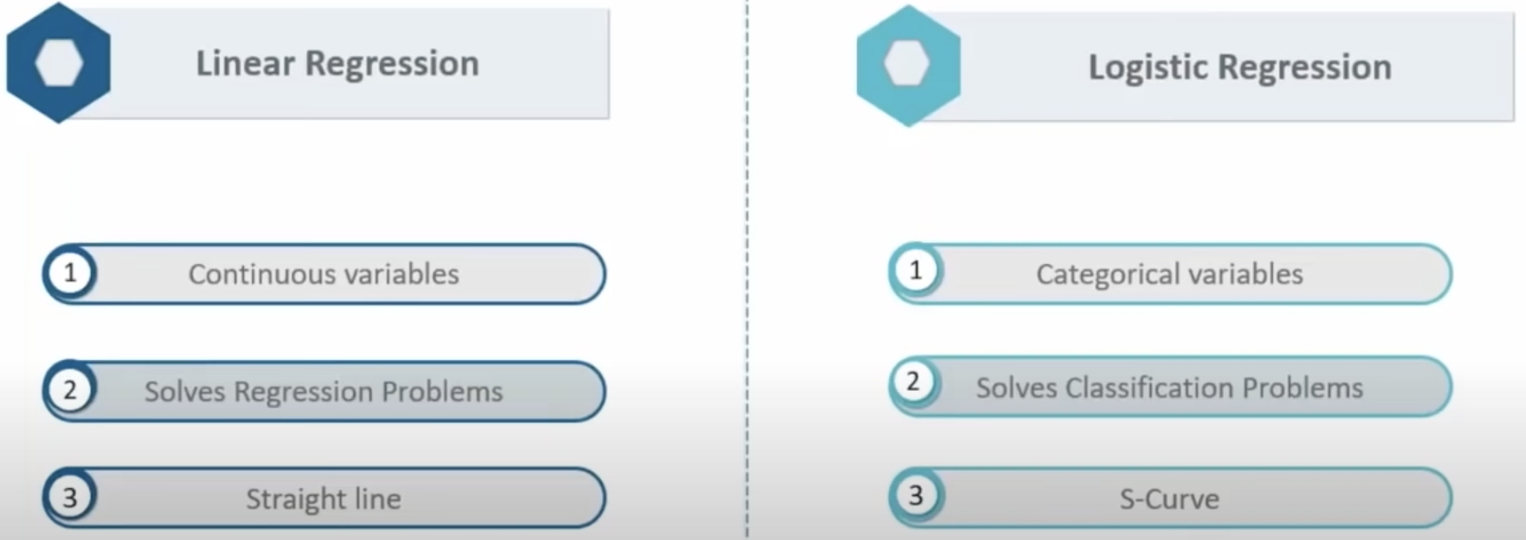

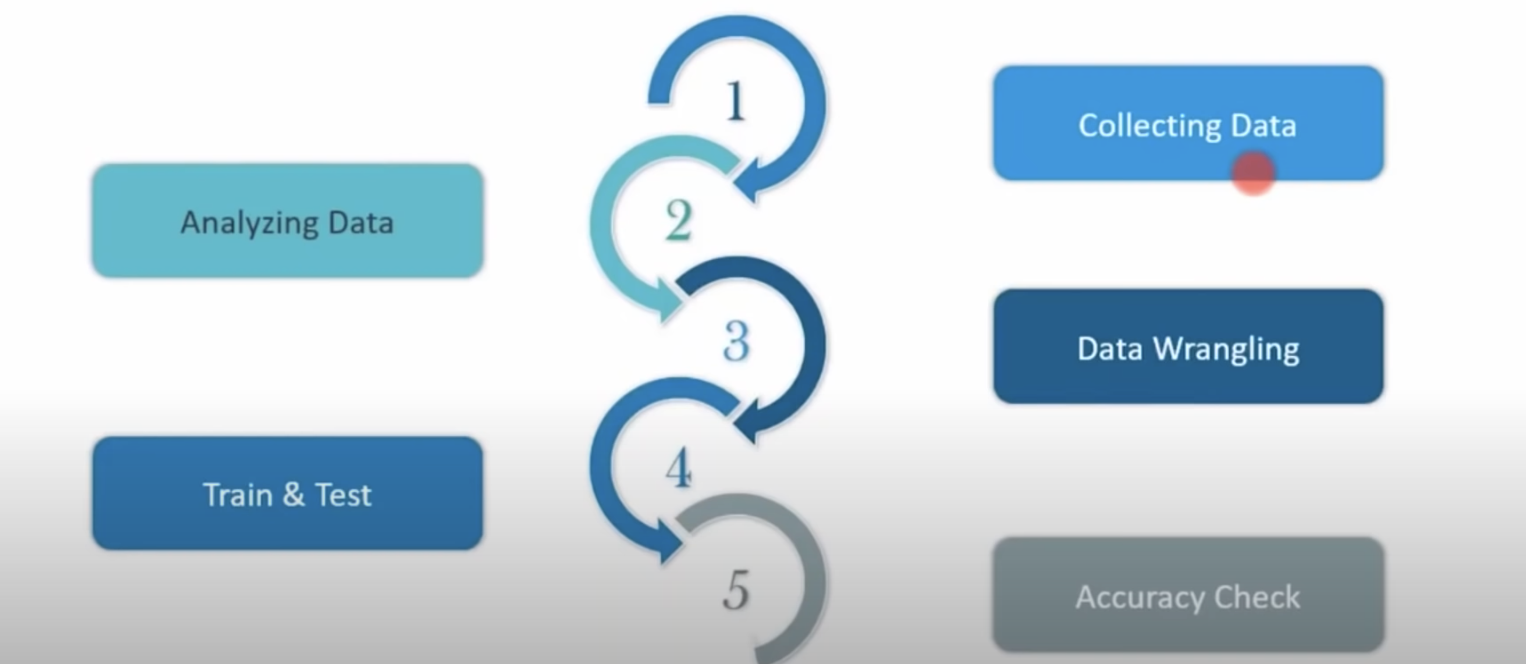

### Collecting Data

In [ ]:
#Collecting Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

titanic = pd.read_csv('./titanic.csv')
print(titanic.shape)
print(titanic.head())

In [ ]:
print("# of passanger :", len(titanic))

### Analyzing Data

In [ ]:
sns.countplot(x='Survived', data=titanic)

In [ ]:
sns.countplot(x='Survived', hue='Sex',data=titanic)

In [ ]:
sns.countplot(x="Survived", hue='Pclass',data=titanic)

In [ ]:
titanic['Age'].plot.hist(figsize=(5,3))

In [ ]:
titanic['Fare'].plot.hist(bins=50,figsize=(10,5))

In [ ]:
titanic.info()

In [ ]:
sns.countplot(x='SibSp', data=titanic)

### Data Wrangling

In [ ]:
titanic.isnull()

In [ ]:
titanic.isnull().sum()

In [ ]:
sns.heatmap(titanic.isnull(), cmap='viridis')

In [ ]:
sns.boxplot(x="Pclass", y='Age',data=titanic)

#### class 1 have older passangers compared to class 2 and 3

In [ ]:
titanic.head(3)

In [ ]:
### lets drop cabin column, because lots of Nan values
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic.head(3)

In [ ]:
## filling missing age data with average age based on their class
n=len(titanic)

age_sex_class = titanic[["Age", "Sex",'Pclass']]
print(age_sex_class.shape)
age_sex_class.head()
age_sex_class.dropna(inplace=True)
print(age_sex_class.shape)
print(age_sex_class.head())

class1_age_mean=age_sex_class.loc[age_sex_class['Pclass'] == 1, 'Age'].mean()
print(class1_age_mean)
class2_age_mean=age_sex_class.loc[age_sex_class['Pclass'] == 2, 'Age'].mean()
print(class2_age_mean)
class3_age_mean=age_sex_class.loc[age_sex_class['Pclass'] == 3, 'Age'].mean()
print(class3_age_mean)

for i in range(n):
    if np.isnan(titanic['Age'][i]) and titanic['Pclass'][i] == 1:
        titanic['Age'][i] = class1_age_mean
    elif np.isnan(titanic['Age'][i]) and titanic['Pclass'][i] == 2:
        titanic['Age'][i] = class2_age_mean
    elif np.isnan(titanic['Age'][i]) and titanic['Pclass'][i] == 3:
        titanic['Age'][i] = class3_age_mean
    

In [ ]:

##checking if there is a null value
print(titanic.shape)
titanic.isnull().sum()

In [ ]:
titanic.dropna(inplace=True)
print(titanic.shape)
titanic.isnull().sum()

In [ ]:
# convert string data into categorical data
titanic.head(2)

In [ ]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head(3)

In [ ]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head(3)

In [ ]:
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
pclass.head(3)

In [ ]:
# add these columns into dataset
titanic=pd.concat([titanic,sex,embark,pclass],axis=1)
titanic.head()

In [ ]:
## dropping columns that we dont need
titanic.drop(['Sex','Embarked','Pclass','PassengerId','Name','Ticket'],axis=1,inplace=True)

titanic.head()

### Train and Test

In [ ]:
X= titanic.iloc[:,1:10].values 
y= titanic.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
#fitting multiple linear rigression to the training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

### Accuracy Check

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cf = confusion_matrix(y_test, y_pred)
asc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("confusion_matrix\n",cf)
print("\nAccuracy score: ",asc)
print("\nclassification_report")
print(cr)

<pre>
<b>Precision:-</b> Accuracy of positive predictions. Precision = TP/(TP + FP)

<b>Recall — </b>What percent of the positive cases did you catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

<b>F1 score — </b>What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

<b>Support</b> is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.
</pre>

## Purchase SUV

In [ ]:
#Collecting Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

suv = pd.read_csv('./SUV_Predictions.csv')
print(suv.shape)
suv.head()

In [ ]:
X=suv.iloc[:,[2,3]].values
y= suv.iloc[:,4]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
#fitting multiple linear rigression to the training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cf = confusion_matrix(y_test, y_pred)
asc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("confusion_matrix\n",cf)
print("\nAccuracy score: ",asc*100 ,"%")
print("\nclassification_report")
print(cr)